In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

TRAINING_DIR = '../lyft_training_data/Train/'
RGB_DIR = 'CameraRGB'
SEG_DIR = 'CameraSeg'

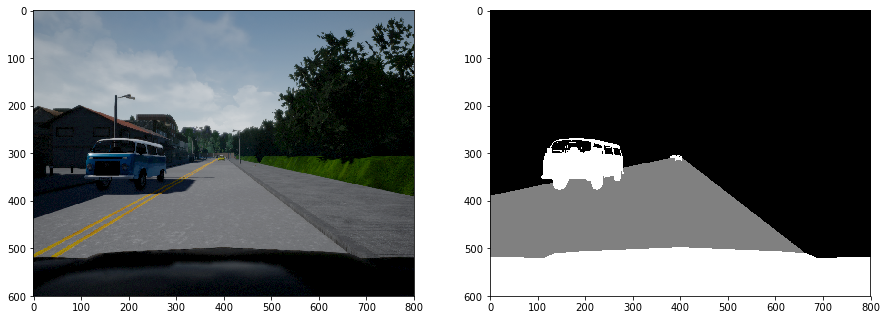

In [39]:
# 0: nothing, 1: road + roadlines, 2: vehicles
SEG_MAP = {
    6: 1, 7: 1,
    10: 2
}

def cut_hood(img, perc_retain=0.9):
    """
    Cut the hood part of the car
    :param img: The image
    :return: Image with the same dimension with percent retained from the top.
    """
    height = img.shape[0]
    return img[0:int(height*perc_retain), :]

def remap_seg(seg, seg_map):
    """
    Re-map segmentation image
    :param seg: Segmentation image, 2-dimensional [width:height]
    :param seg_map: dict object, mapping of old_id to new_id,
                    unmapped ids are converted to 0.
    :return: Remapped image, one channel
    """
    keys = list(seg_map.keys())
    
    # Convert unmapped cells
    seg[~np.isin(seg, keys)] = 0
    
    # Convert cells with relevant keys
    for key in keys:
        seg[seg == key] = seg_map[key]
    return seg

def seg2labels(seg, num_classes=3):
    """
    Convert segmentation image into multi channels,
    that may be used as labels to use in the neural network.
    :return: Multi-channel image
    """
    labels = np.zeros((seg.shape[0], seg.shape[1], num_classes))
    for c in range(num_classes):
        layer = np.zeros(seg.shape)
        layer[seg == c] = True
        labels[:,:, c] = layer
    return labels

rgb = cv2.imread(os.path.join(TRAINING_DIR, RGB_DIR, '17.png'), cv2.IMREAD_COLOR)
rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
seg = remap_seg(cv2.imread(os.path.join(TRAINING_DIR, SEG_DIR, '17.png'),
                           cv2.IMREAD_COLOR)[:, :, 2], SEG_MAP)

labels = seg2labels(seg)
seg = seg * 100

plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(rgb)
plt.subplot(222), plt.imshow(seg, cmap='gray')
plt.show()

Show by layers

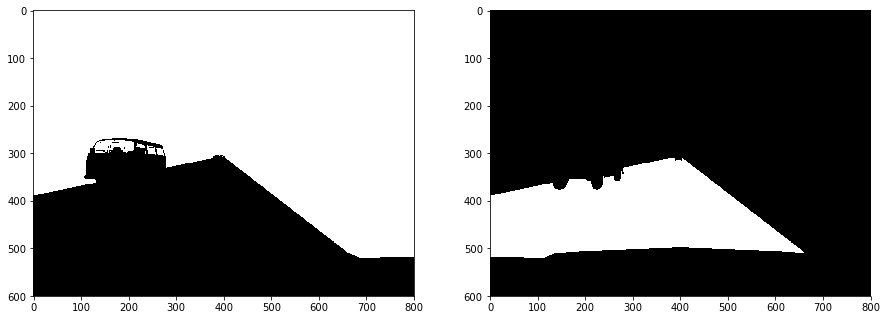

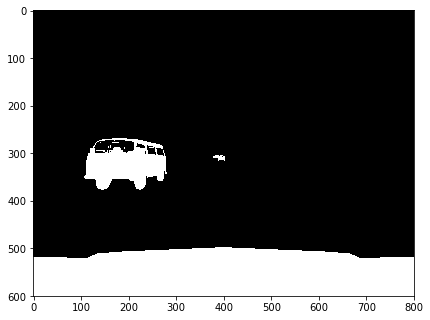

In [36]:
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(labels[:, :, 0], cmap='gray')
plt.subplot(222), plt.imshow(labels[:, :, 1], cmap='gray')
plt.show()
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(labels[:, :, 2], cmap='gray')
plt.show()

In [21]:
os.path.join(TRAINING_DIR, RGB_DIR, SEG_DIR, '0.png')

'../lyft_training_data/Train/CameraRGB/CameraSeg/0.png'

In [29]:
np.unique(seg)

array([  0,  32,  44,  88, 100, 132, 144, 176, 188, 200, 232, 244],
      dtype=uint8)

In [30]:
rgb.shape

(600, 800, 3)